### Calculate seasonal LAI

In [1]:
%who

Interactive namespace is empty.


In [2]:
import numpy as np
import xarray as xr
import pandas as pd

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/'
out_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/seas_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in range(2003, 2022):
    print('Working on year' + str(year))
    fnames =  [data_dir + fname_prefix + str(year-1) + '_QC.nc', data_dir + fname_prefix + str(year) + '_QC.nc']
    ds_lai = xr.open_mfdataset(fnames, chunks = {'time': 1})#chunks = {'lat':800, 'lon':1000})
    da_temp = ds_lai.sel(time = slice(str(year-1)+ "-12", str(year)+ "-11")).groupby('time.season').mean('time')
    
    # time_index = pd.date_range(str(year) + "-01", freq="3MS", periods=4). The season are in order DJF, JJA, MAM, SON - so can't assign this directly.
    
    out_file_path = out_dir + fname_prefix + str(year) + '_QC.nc'
    da_temp.to_netcdf(out_file_path)

Working on year2003
Working on year2004
Working on year2005
Working on year2006
Working on year2007
Working on year2008
Working on year2009
Working on year2010
Working on year2011
Working on year2012
Working on year2013
Working on year2014
Working on year2015
Working on year2016
Working on year2017
Working on year2018
Working on year2019
Working on year2020
Working on year2021


### First look GPP data

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

data_dir = '/g/data/w97/ad9701/MODIS/'

# check that the time dimensons in both terra and aqua are equal
# 2002 file check: The mod data contains 2001 as well, which is not available in the myd file
# 2021 file check: The myd data contains two time steps fewer than the mod data

for year in [2021]: #range(2002, 2022):
    ds_mod = xr.open_mfdataset(data_dir + 'MOD17A2HGF.061/MOD17A2HGF.061_500m_aid0001_' + str(year) + '.nc')
    ds_myd = xr.open_mfdataset(data_dir + 'MYD17A2HGF.061/MYD17A2HGF.061_500m_aid0001_' + str(year) + '.nc')
    if ds_mod.time.equals(ds_myd.time):
        print(str(year) + ' times are the same')
    else:
        print('Check ' + str(year))

Check 2021


In [8]:
da_test = ds_mod['Gpp_500m'][0,700:1400,5000:5700].load()#plot()

In [7]:
ds_mod['Gpp_500m']

<xarray.DataArray 'Gpp_500m' (time: 42, lat: 8236, lon: 10565)>
dask.array<open_dataset-ed72be39e134b1154e4df8c14546dc5dGpp_500m, shape=(42, 8236, 10565), dtype=float32, chunksize=(42, 8236, 10565), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-12-26 00:00:00 ... 2021-11-17 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:       crs
    valid_min:          0
    valid_max:          30000
    scale_factor_err:   0.0
    add_offset_err:     0.0
    calibrated_nt:      22
    long_name:          MODIS/Terra Gross Primary Production (GPP) 8-Day L4 G...
    units:              kg_C_/m^2
    Gpp_FILLVALUE_DOC:  FILL VALUE LEGEND\n32767 : _Fillvalue: not-computed o...

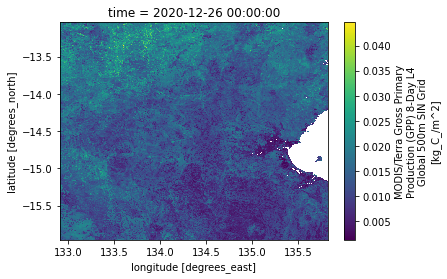

In [10]:
da_test.where(da_test<3.2).plot()

In [12]:
np.unique(da_test.where(da_test>3.2).values)

array([3.2765, 3.2766,    nan], dtype=float32)

In [ ]:
da_test.plot()

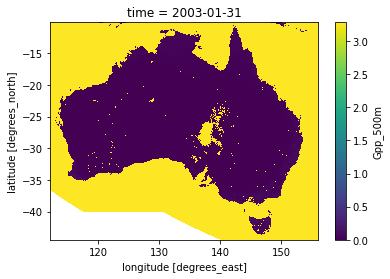

In [8]:
year = 2003
ds_mod_mon = xr.open_mfdataset(data_dir + 'MOD17A2HGF.061/mon_mean/MOD17A2HGF.061_500m_aid0001_' + str(year) + '.nc')
ds_mod_mon['Gpp_500m'][0,:,:].plot()

In [17]:
da = ds_mod_mon['Gpp_500m'][0,:,:].load()

In [18]:
da_fill = da.where(da>3.2)
np.unique(da_fill.values)

array([3.2761998, 3.2765   , 3.2766   ,       nan], dtype=float32)

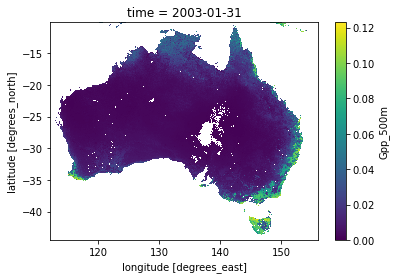

In [20]:
da.where(da<3.2).plot()

### Calculate mon mean and seas mean for both sets of GPP data

In [1]:
%who

Interactive namespace is empty.


In [2]:
import sys
new_path = '/home/566/ad9701/drought_2017to2020/'
if new_path not in sys.path:
    sys.path.append(new_path)

import data_process_funcs_lai_gpp as dproc

In [3]:
# end year is 2020 for the MYD.. data & 2021 for the MOD.. data
for prod_name in ['MYD17A2HGF.061']: #['MOD17A2HGF.061']:#, 'MYD17A2HGF.061']:

    data_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/'
    out_dir = data_dir + '/mon_mean/'
    fname_prefix = prod_name + '_500m_aid0001_'
    fname_suffix = '.nc'
    start_yr = 2003
    end_yr = 2020
    varname = 'Gpp_500m'
                  
    #######################
    # monthly mean
    #######################
    # dproc.calc_monmean_modis(data_dir = data_dir,
    #                          fname_prefix = fname_prefix, 
    #                          fname_suffix = fname_suffix, 
    #                          start_yr = start_yr, 
    #                          end_yr = end_yr,
    #                          out_dir = out_dir, 
    #                          varname = varname)
    #######################
    # seasonal mean
    ####################### 
    
    out_dir = data_dir + '/seas_mean/'
    dproc.calc_seasmean_modis(data_dir = data_dir,
                         fname_prefix = fname_prefix, 
                         fname_suffix = fname_suffix, 
                         start_yr = start_yr, 
                         end_yr = end_yr,
                         out_dir = out_dir, 
                         varname = varname)
    

Working on year 2003
Working on year 2004
Working on year 2005
Working on year 2006
Working on year 2007
Working on year 2008
Working on year 2009
Working on year 2010
Working on year 2011
Working on year 2012
Working on year 2013
Working on year 2014
Working on year 2015
Working on year 2016
Working on year 2017
Working on year 2018
Working on year 2019


In [10]:
# remove missing values from monthly and seasonal means

for prod_name in ['MYD17A2HGF.061']: #['MOD17A2HGF.061']:#, 'MYD17A2HGF.061']:

    data_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/'
    out_dir = data_dir + '/mon_mean/'
    fname_prefix = prod_name + '_500m_aid0001_'
    fname_suffix = '.nc'
    start_yr = 2003
    end_yr = 2020
    varname = 'Gpp_500m'
                  
    #######################
    # monthly mean
    #######################
    # dproc.calc_monmean_modis(data_dir = data_dir,
    #                          fname_prefix = fname_prefix, 
    #                          fname_suffix = fname_suffix, 
    #                          start_yr = start_yr, 
    #                          end_yr = end_yr,
    #                          out_dir = out_dir, 
    #                          varname = varname)
    #######################
    # seasonal mean
    ####################### 
    
    out_dir = data_dir + '/seas_mean/'
    dproc.calc_seasmean_modis(data_dir = data_dir,
                         fname_prefix = fname_prefix, 
                         fname_suffix = fname_suffix, 
                         start_yr = start_yr, 
                         end_yr = end_yr,
                         out_dir = out_dir, 
                         varname = varname)

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [11]:
import pandas as pd
start_mon='01'
year=2003
pd.date_range(str(year) + start_mon, freq="M", periods=(12-int(start_mon)+1))

DatetimeIndex(['2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30',
               '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31',
               '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28'],
              dtype='datetime64[ns]', freq='M')

In [2]:
%who

Interactive namespace is empty.


In [13]:
import xarray as xr
import glob
import os

def remove_fillvals(in_dir, fname_prefix, varname, fillthresh, out_dir):
    '''
    Function to remove fill values above a threshold
    Missed this while processsing the mon & seas mean data
    '''
    fnames = glob.glob(in_dir + fname_prefix + '*.nc')
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    for f in fnames:
        ds = xr.open_dataset(f)
        da_nofill = ds[varname].where(ds[varname] < fillthresh)
        da_nofill.encoding['zlib'] = True
        da_nofill.encoding['complevel'] = 1
        da_nofill.to_netcdf(out_dir + f.split('/')[-1])

In [5]:
# remove missing values from monthly and seasonal means
for prod_name in ['MYD17A2HGF.061', 'MOD17A2HGF.061']:
    in_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/seas_mean_temp/'
    out_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/seas_mean/'
    fname_prefix = prod_name
    varname = 'Gpp_500m'
    fillthresh = 3.2
    dproc.remove_fillvals(in_dir = in_dir,
                    fname_prefix = fname_prefix,
                    varname = varname,
                    fillthresh = fillthresh,
                    out_dir = out_dir)

    in_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/mon_mean_temp/'
    out_dir = '/g/data/w97/ad9701/MODIS/' + prod_name + '/mon_mean/'
    fname_prefix = prod_name
    varname = 'Gpp_500m'
    fillthresh = 3.2
    dproc.remove_fillvals(in_dir = in_dir,
                    fname_prefix = fname_prefix,
                    varname = varname,
                    fillthresh = fillthresh,
                    out_dir = out_dir)

In [4]:
f = '/g/data/w97/ad9701/MODIS/MOD17A2HGF.061/mon_mean_temp/MOD17A2HGF.061_500m_aid0001_2012.nc'

In [6]:
f.split('/')[-1]

'MOD17A2HGF.061_500m_aid0001_2012.nc'

In [5]:
%who

Client	 LocalCluster	 aqua	 aqua_dir	 aqua_prefix	 aqua_suffix	 client	 cluster	 comb	 
dproc	 end_yr	 main_dir	 new_path	 out_dir	 out_prefix	 out_suffix	 start_yr	 sys	 
terra	 terra_dir	 terra_prefix	 terra_suffix	 timescale	 units	 varname	 


In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [4]:
cluster.scale(cores = 0)

In [3]:
##### Take mean of TERRA and AQUA #####

import sys
new_path = '/home/566/ad9701/drought_2017to2020/'
if new_path not in sys.path:
    sys.path.append(new_path)

import data_process_funcs_lai_gpp as dproc

for timescale in ['mon']: #, 'seas']:
    main_dir = '/g/data/w97/ad9701/MODIS/'
    terra = 'MOD17A2HGF.061'
    terra_dir =  main_dir + terra + '/' + timescale + '_mean/'
    terra_prefix = terra + '_500m_aid0001_'
    terra_suffix = '.nc'

    aqua = 'MYD17A2HGF.061'
    aqua_dir = main_dir + aqua + '/' + timescale + '_mean/'
    aqua_prefix = aqua + '_500m_aid0001_'
    aqua_suffix = '.nc'

    start_yr = 2003
    end_yr = 2020

    comb = 'MOD_MYD_17A2HGF.061'
    out_dir = main_dir + comb + '/' + timescale + '_mean/'
    out_prefix = comb + '_mean_'
    out_suffix = '.nc'

    # lost the units in the file when calculating mon & seas mean
    varname = 'Gpp_500m'
    units = 'kg_C_/m^2'

    dproc.combine_terra_aqua(terra_dir = terra_dir, terra_prefix = terra_prefix, terra_suffix = terra_suffix, 
                             aqua_dir = aqua_dir, aqua_prefix = aqua_prefix, aqua_suffix = aqua_suffix, 
                             start_yr = start_yr, end_yr = end_yr, 
                             out_dir = out_dir, out_prefix = out_prefix, out_suffix = out_suffix, varname = varname, units = units)

Working on year 2003


distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:33011
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/comm/tcp.py", line 215, in read
    n = await stream.read_into(chunk)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/worker.py", line 3071, in gather_dep
    response = await get_data_from_worker(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/worker.py", line 4377, in get_data_from_worker
    return await retry_operation(_get_data, operation="get_data_from_worker")
  File "/g/data/hh5/public/apps/miniconda3/envs/ana

KilledWorker: ("('getitem-dd9618745e11e5204ed2f2e7c462795f', 18, 0, 0)", <WorkerState 'tcp://127.0.0.1:42899', name: 0, status: closed, memory: 0, processing: 22>)

distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:44321 -> tcp://127.0.0.1:42899
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/tornado/iostream.py", line 867, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/tornado/iostream.py", line 1140, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
ConnectionResetError: [Errno 104] Connection reset by peer

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/worker.py", line 1814, in get_data
    response = await comm.read(deserializers=serializers)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/distributed/comm/tcp.py", line 221,

In [1]:
import xarray as xr
file2 = '/g/data/w97/ad9701/MODIS/MOD17A2HGF.061/mon_mean/MOD17A2HGF.061_500m_aid0001_2019.nc'
ds2 = xr.open_dataset(file2)
ds2

<xarray.Dataset>
Dimensions:   (lat: 8236, lon: 10565, time: 12)
Coordinates:
  * lat       (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon       (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
  * time      (time) datetime64[ns] 2019-01-31 2019-02-28 ... 2019-12-31
Data variables:
    Gpp_500m  (time, lat, lon) float32 ...

In [5]:
ds2['Gpp_500m'].nbytes/10**9

4.17664032

In [13]:
file3 = '/g/data/w97/ad9701/MODIS/MOD17A2HGF.061/MOD17A2HGF.061_500m_aid0001_2019.nc'
ds3 = xr.open_dataset(file3)
ds3['Gpp_500m']

<xarray.DataArray 'Gpp_500m' (time: 47, lat: 8236, lon: 10565)>
[4089626980 values with dtype=float32]
Coordinates:
  * time     (time) object 2018-12-27 00:00:00 ... 2019-12-27 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:       crs
    valid_min:          0
    valid_max:          30000
    scale_factor_err:   0.0
    add_offset_err:     0.0
    calibrated_nt:      22
    long_name:          MODIS/Terra Gross Primary Production (GPP) 8-Day L4 G...
    units:              kg_C_/m^2
    Gpp_FILLVALUE_DOC:  FILL VALUE LEGEND\n32767 : _Fillvalue: not-computed o...

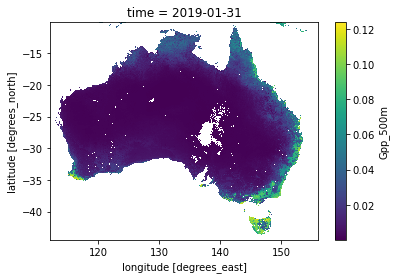

In [8]:
da2 = ds2['Gpp_500m'][0,:,:]
da2.plot()
#da2.where(da2>3.7).plot()

In [1]:
import xarray as xr
file1 = '/g/data/w97/ad9701/MODIS/MOD17A2HGF.061/mon_mean_temp/MOD17A2HGF.061_500m_aid0001_2019.nc'
ds1 = xr.open_dataset(file1)
ds1

<xarray.Dataset>
Dimensions:   (lat: 8236, lon: 10565, time: 12)
Coordinates:
  * lat       (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon       (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
  * time      (time) datetime64[ns] 2019-01-31 2019-02-28 ... 2019-12-31
Data variables:
    Gpp_500m  (time, lat, lon) float32 ...

In [2]:
da = ds1['Gpp_500m'][0,:,:]
# da.where(da<3.7).plot()

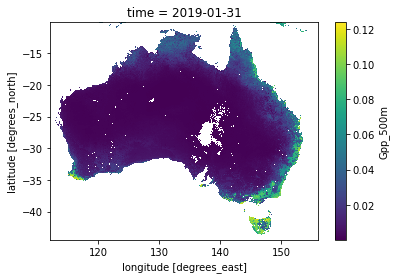

In [3]:
da.where(da<3.2).plot()

In [ ]:
dproc.combine_terra_aqua(terra_dir, terra_prefix, terra_suffix, 
                   aqua_dir, aqua_prefix, aqua_suffix, 
                   start_yr, end_yr, 
                   out_dir, out_prefix, out_suffix)